# importing the library

In [1]:
import numpy as np
import pandas as pd
import nltk

# read the data set

In [3]:
sms = pd.read_csv('spam.csv', encoding ='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"label","v2":"text"})
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Explore the data

In [5]:
print("no. of rows",len(sms))

no. of rows 5572


In [6]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
sms['length']=sms['text'].apply(len)
sms.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# plot

<AxesSubplot:ylabel='Frequency'>

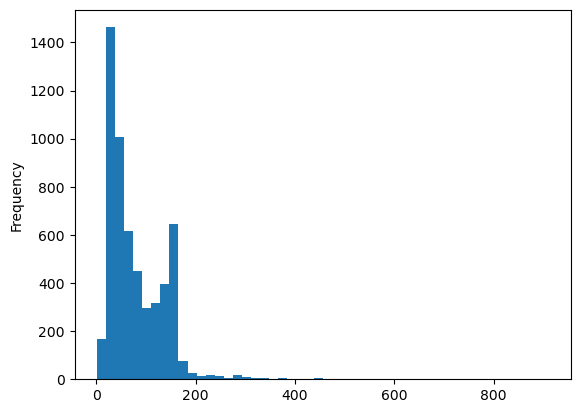

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sms['length'].plot(bins=50,kind='hist')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

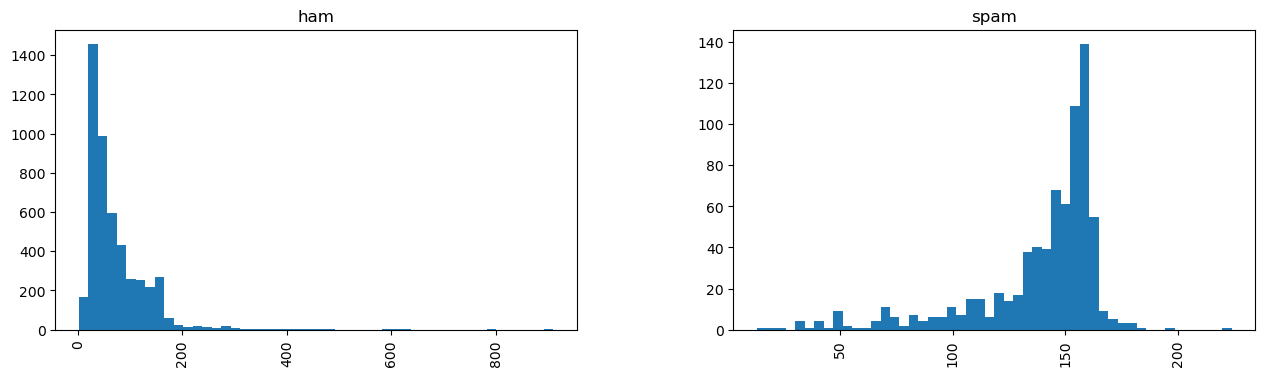

In [12]:
sms.hist(column='length',by='label', bins=50, figsize=(15,4))

In [13]:
sms.loc[:,'label']=sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Implement Bag of Words

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

count = CountVectorizer()
input = ['WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.']
text=count.fit_transform(sms['text'])

x_train, x_test, y_train, y_test   =  train_test_split(text,sms['label'],test_size = 0.20,random_state = 1)

In [38]:
print(x_train.shape)
print(x_test.shape)

input=text[5571]

(4457, 8672)
(1115, 8672)


# implementation of ML Model

In [29]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [30]:
prediction= model.predict(x_test)
print(prediction)

[0 0 0 ... 0 0 0]


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy score: {}".format(accuracy_score(y_test,prediction)))
print("Precision score: {}".format(precision_score(y_test,prediction)))
print("Recall score: {}".format(recall_score(y_test,prediction)))
print("F1 score: {}".format(f1_score(y_test,prediction)))

Accuracy score: 0.97847533632287
Precision score: 0.891156462585034
Recall score: 0.9424460431654677
F1 score: 0.9160839160839161


In [39]:
input

<1x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [40]:
model.predict(input)

array([0], dtype=int64)